In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('Luke_hair_loss_documentation.csv')

In [3]:
df
df.columns

Index(['date ', 'hair_loss', 'stay_up_late', 'pressure_level',
       'coffee_consumed', 'brain_working_duration', 'school_assesssment',
       'stress_level', 'shampoo_brand', 'swimming', 'hair_washing',
       'hair_grease', 'dandruff', 'libido'],
      dtype='object')

In [4]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

,count,mean,std,min,25%,50%,75%,max
stay_up_late,400.0,1.910000,1.611954,0.0,1.0,2.0,3.0,8.0
coffee_consumed,400.0,1.162500,1.978859,0.0,0.0,0.0,1.0,10.0
brain_working_duration,400.0,3.970000,4.215272,0.0,1.0,2.0,7.0,18.0
hair_grease,396.0,2.565657,1.276162,1.0,2.0,2.0,4.0,5.0
libido,400.0,2.787500,1.822264,0.0,1.0,3.0,5.0,5.0


In [5]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'date ': ['1/1/2021' '2/1/2021' '3/1/2021' '4/1/2021' '5/1/2021' '6/1/2021'
 '7/1/2021' '8/1/2021' '9/1/2021' '10/1/2021' '11/1/2021' '12/1/2021'
 '13/01/2021' '14/01/2021' '15/01/2021' '16/01/2021' '17/01/2021'
 '18/01/2021' '19/01/2021' '20/01/2021' '21/01/2021' '22/01/2021'
 '23/01/2021' '24/01/2021' '25/01/2021' '26/01/2021' '27/01/2021'
 '28/01/2021' '29/01/2021' '30/01/2021' '31/01/2021' '1/2/2021' '2/2/2021'
 '3/2/2021' '4/2/2021' '5/2/2021' '6/2/2021' '7/2/2021' '8/2/2021'
 '9/2/2021' '10/2/2021' '11/2/2021' '12/2/2021' '13/02/2021' '14/02/2021'
 '15/02/2021' '16/02/2021' '17/02/2021' '18/02/2021' '19/02/2021'
 '20/02/2021' '21/02/2021' '22/02/2021' '23/02/2021' '24/02/2021'
 '25/02/2021' '26/02/2021' '27/02/2021' '28/02/2021' '1/3/2021' '2/3/2021'
 '3/3/2021' '4/3/2021' '5/3/2021' '6/3/2021' '7/3/2021' '8/3/2021'
 '9/3/2021' '10/3/2021' '11/3/2021' '12/3/2021' '13/03/2021' '14/03/2021'
 '15/03/2021' '16/03/2021' '17/03/2021' '18/03/2021' '19/03/2021'
 '

In [6]:
df['hair_loss'] = df['hair_loss'].replace({'Few': 1, 'Medium': 2, 'Many': 3, 'A lot': 4})
df['stress_level'] = df['stress_level'].replace({'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4})
df['shampoo_brand'] = df['shampoo_brand'].replace({'Pantene': 1, 'Hair & Shoulder': 2})
df['swimming'] = df['swimming'].replace({'No': 0, 'Yes': 1})
df['hair_washing'] = df['hair_washing'].replace({'Y': 1, 'N': 0})
df['dandruff'] = df['dandruff'].replace({'Many': 1, 'Few': 0})
                                                                                                  

del df['school_assesssment']
df = df.iloc[:, 1:]

df.replace('nan', np.NaN, inplace=True)
df['dandruff'] = pd.to_numeric(df['dandruff'])
df['hair_grease'] = pd.to_numeric(df['hair_grease'])

mean = df['dandruff'].mean()
df['dandruff'].fillna(mean, inplace=True)

mean = df['hair_grease'].mean()
df['hair_grease'].fillna(mean, inplace=True)

for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'hair_loss': [1 2 3 4]
Unique values in column 'stay_up_late': [2 0 3 1 4 5 6 8]
Unique values in column 'pressure_level': ['Low' 'Medium' 'High' 'Very High']
Unique values in column 'coffee_consumed': [ 0  1  2  3  4  5  6  7  8  9 10]
Unique values in column 'brain_working_duration': [ 1  3  0  2  6  7  5  8  9 10 12 13 16 18 11]
Unique values in column 'stress_level': [1 2 3 4]
Unique values in column 'shampoo_brand': [1 2]
Unique values in column 'swimming': [0 1]
Unique values in column 'hair_washing': [1 0]
Unique values in column 'hair_grease': [3.         1.         2.         4.         5.         2.56565657]
Unique values in column 'dandruff': [0.31531532 0.         1.        ]
Unique values in column 'libido': [1 2 3 4 5 0]


In [7]:
df['pressure_level'] = df['pressure_level'].replace({'Low': 1, 'Medium': 0, 'High': 0, 'Very High': 0})

<Axes: >

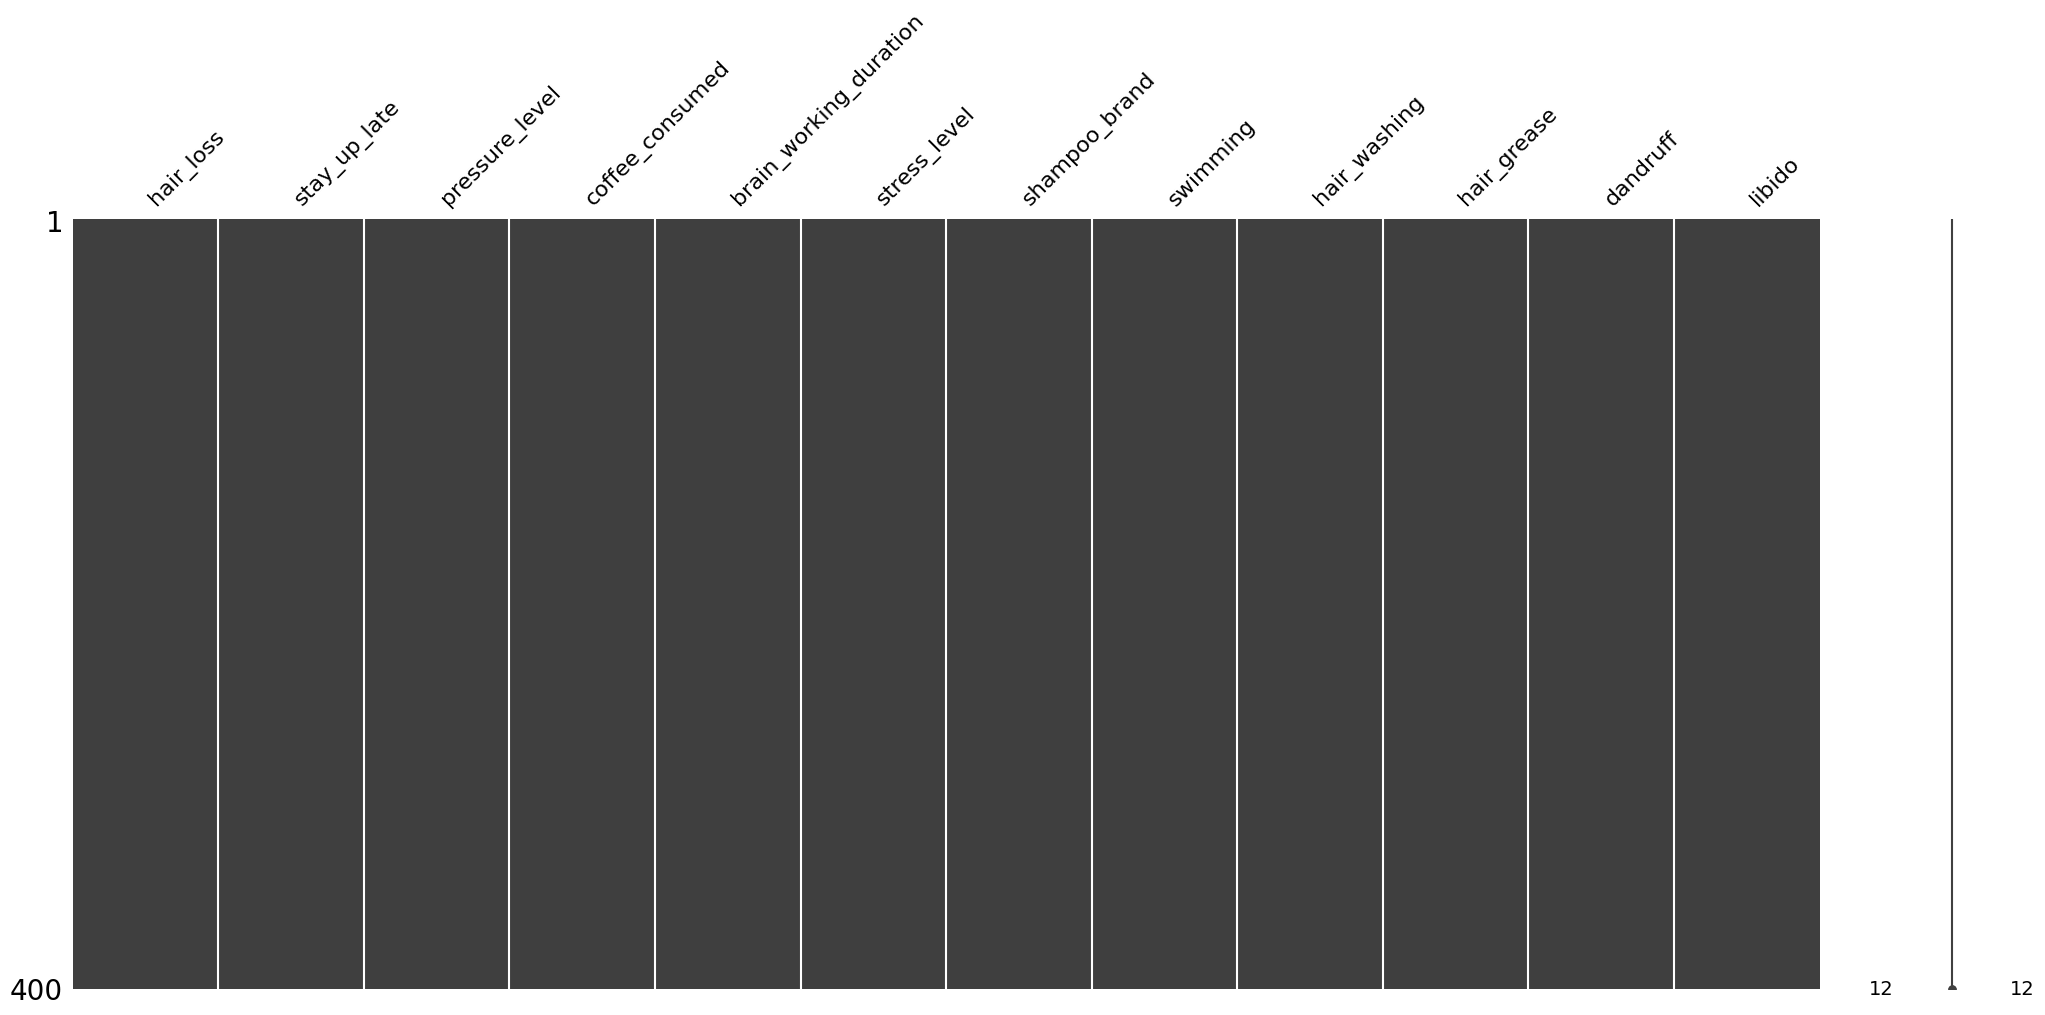

In [8]:
msno.matrix(df)

                        hair_loss
hair_loss                1.000000
stay_up_late             0.415415
pressure_level          -0.597237
coffee_consumed          0.678935
brain_working_duration   0.577692
stress_level             0.736272
shampoo_brand            0.266491
swimming                -0.188286
hair_washing             0.063405
hair_grease              0.672344
dandruff                 0.313662
libido                   0.350831


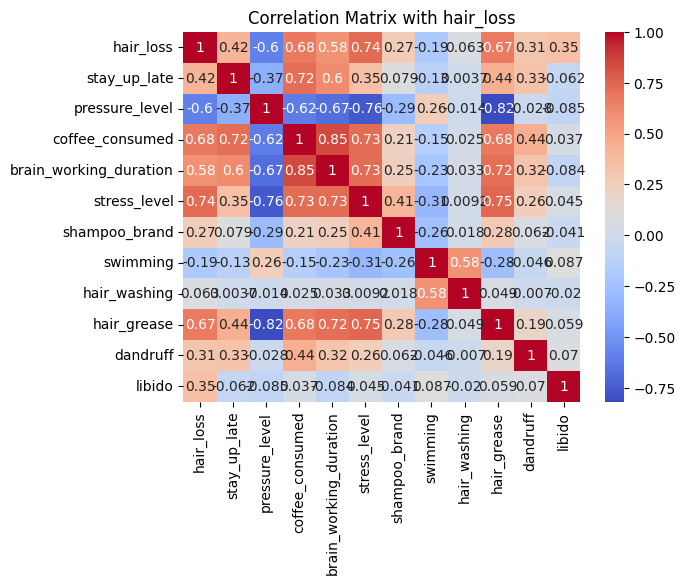

In [9]:
chosen_column = "hair_loss" 

corr_matrix = df.corr(method='pearson')


print(corr_matrix[[chosen_column]])  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show() 

In [10]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
X

,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,2,1,0,1,1,1,0,1,3.0,0.315315,1
1,0,1,0,3,1,1,0,0,1.0,0.315315,1
2,3,1,1,0,1,1,1,1,2.0,0.315315,2
3,2,1,0,1,1,1,0,0,3.0,0.315315,3
4,2,1,0,1,1,1,0,1,1.0,0.315315,2
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,1,2,1,2,0,0,1.0,0.315315,5
396,1,1,0,3,1,2,1,1,2.0,0.315315,1
397,1,1,1,1,1,2,0,0,2.0,0.315315,5
398,0,1,1,1,1,2,0,0,2.0,0.315315,5


In [12]:
y.head(20)

0     1
1     1
2     2
3     1
4     1
5     1
6     2
7     1
8     1
9     2
10    2
11    2
12    2
13    2
14    2
15    1
16    1
17    1
18    1
19    1
Name: hair_loss, dtype: int64

In [13]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [18]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [21]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = classifier.predict(X_test)

In [22]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [23]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 80.83333333333333
K Nearest neighbors: 75.83333333333333
Support Vector Classifier: 85.0
Naive Bayes: 61.66666666666667
Decision tree: 95.83333333333334
Random Forest: 95.83333333333334


In [24]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("hair_loss.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()